## Welcome to ZoeDepth Colab notebook

This notebook provides an easy to use interface for the depth estimation model "ZoeDepth".

It accompanies our paper : [ZoeDepth: Zero-shot Transfer by Combining Relative and Metric Depth](https://arxiv.org/abs/2302.12288v1)

# Setup

In [1]:
!pip install --upgrade timm


[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!git clone https://github.com/isl-org/ZoeDepth.git

Cloning into 'ZoeDepth'...


In [7]:
cd ZoeDepth

c:\Users\boukh\OneDrive\Bureau\Study\7S\Thesis\ai-object-detection\zoe_detect\ZoeDepth


Sanity checks, to make sure everything is working

In [7]:
!python sanity.py

Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to C:\Users\boukh/.cache\torch\hub\master.zip
Using cache found in C:\Users\boukh/.cache\torch\hub\intel-isl_MiDaS_master
c:\Users\boukh\OneDrive\Bureau\Study\7S\Thesis\ai-object-detection\zoe_detect\.venv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
c:\Users\boukh\OneDrive\Bureau\Study\7S\Thesis\ai-object-detection\zoe_detect\ZoeDepth\sanity.py:89: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pred = pred.resize(orig_size, Image.ANTIALIAS)



******************** Testing zoedepth ********************
Config:
{'attractor_alpha': 1000,
 'attractor_gamma': 2,
 'attractor_kind': 'mean',
 'attractor_type': 'inv',
 'aug': True,
 'bin_centers_type': 'softplus',
 'bin_embedding_dim': 128,
 'clip_grad': 0.1,
 'dataset': 'nyu',
 'distributed': True,
 'force_keep_ar': True,
 'gpu': None,
 'img_size': [384, 512],
 'inverse_midas': False,
 'log_images_every': 0.1,
 'max_temp': 50.0,
 'max_translation': 100,
 'memory_efficient': True,
 'midas_model_type': 'DPT_BEiT_L_384',
 'min_temp': 0.0212,
 'model': 'zoedepth',
 'n_attractors': [16, 8, 4, 1],
 'n_bins': 64,
 'name': 'ZoeDepth',
 'notes': '',
 'output_distribution': 'logbinomial',
 'prefetch': False,
 'pretrained_resource': 'url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt',
 'print_losses': False,
 'project': 'ZoeDepth',
 'random_crop': False,
 'random_translate': False,
 'root': '.',
 'save_dir': 'C:\\Users\\boukh/shortcuts/monodepth3_checkpoints',
 'sh

In [14]:
# # Download file, only works on Chrome
# from google.colab import files
# files.download("pred.png")

# Load the model

In [8]:
import torch
from zoedepth.utils.misc import get_image_from_url, colorize
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("cpu")

In [9]:
zoe = torch.hub.load(".", "ZoeD_N", source="local", pretrained=True)

img_size [384, 512]


Using cache found in C:\Users\boukh/.cache\torch\hub\intel-isl_MiDaS_master
c:\Users\boukh\OneDrive\Bureau\Study\7S\Thesis\ai-object-detection\zoe_detect\.venv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully


In [10]:
zoe = zoe.to(device)

# Prediction

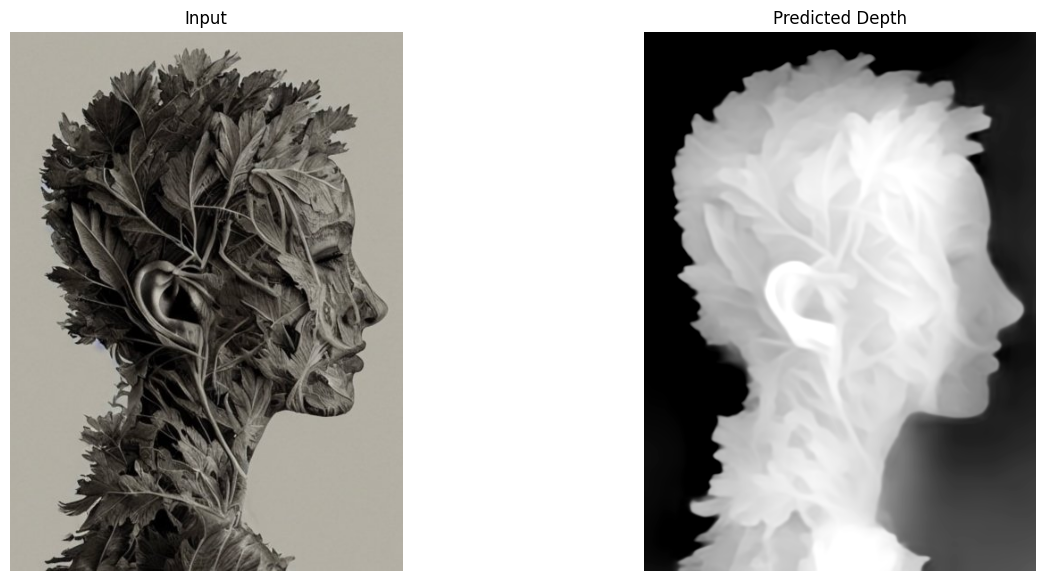

In [27]:
#@title Predicting depth from a url image
img_url = "http://static1.squarespace.com/static/6213c340453c3f502425776e/62f2452bc121595f4d87c713/62f3c63c5eec2b12a333f851/1661442296756/Screenshot+2022-08-10+at+15.55.27.png?format=1500w" #@param {type:"string"}
img = get_image_from_url(img_url)
depth = zoe.infer_pil(img)


colored_depth = colorize(depth)
fig, axs = plt.subplots(1,2, figsize=(15,7))
for ax, im, title in zip(axs, [img, colored_depth], ['Input', 'Predicted Depth']):
  ax.imshow(im)
  ax.axis('off')
  ax.set_title(title)

In [12]:
import cv2
import time

cap = cv2.VideoCapture(0)

while cap.isOpened():

    ret, img = cap.read()

    depth = zoe.infer_pil(img)
    colored_depth = colorize(depth)

    cv2.imshow("", colored_depth)

    if cv2.waitKey(1) &0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()

cap.release()

: 